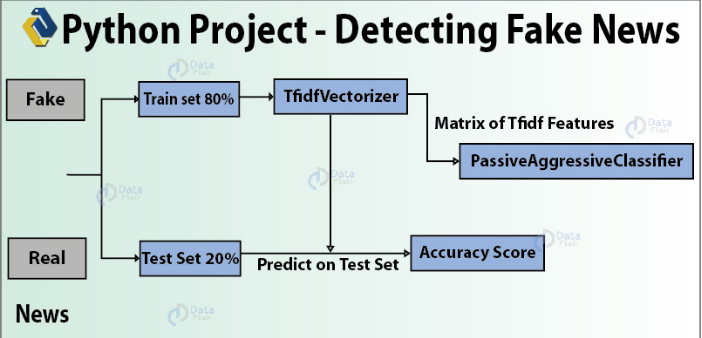

## Step 1 --> Installing required libraries

In [1]:
pip install numpy pandas sklearn

Note: you may need to restart the kernel to use updated packages.


## Step 2 ---> importing necessary files and libraries

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model  import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Step 3 ----> Now, let’s read the data into a DataFrame(using the pandas library), and get the shape of the data and the first 5 records

In [3]:
##Reading the data
data_frame = pd.read_csv('/home/ashish/projects/Fake-NEWS-Detection/news.csv')

##Getting the head and shape of the dataframe
data_frame.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
print("The shape of the dataset is:: ",end=" ")
data_frame.shape

The shape of the dataset is::  

(6335, 4)

## Step 4 ----> Getting the labels from the dataframe 

In [6]:
labels = data_frame.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## Step 5 ---->  Splitting the data into two sets i.e. training set and testing set

In [7]:
##Splitting the dataset

##sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None(it may be any integer between 0 to 42), shuffle=True, stratify=None)
x_train,x_test,y_train,y_test = train_test_split(data_frame['text'],labels, test_size=0.2,random_state=7)

# Step 6 ----> Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. 

## And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [11]:
## fiting and transforming the vectorizer on the train set, and then transform the vectorizer on the test set.
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',max_df=0.7)


## Fit and transform the train_set, then transfrom the test_set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

## Step 7 ---> Next, we’ll initialize a PassiveAggressiveClassifier. This is where We’ll fit this PassiveAggressiveClassifier on tfidf_train and y_train.

In [12]:
## Initialising a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

## Making predictions on the test set 
y_pred = pac.predict(tfidf_test)


## Calculating accuracy
score  = accuracy_score(y_test,y_pred)
print(f'Accuracy is : {round(score*100,2)}%')

Accuracy is : 92.98%


#                            ACCCURACY = 92.74%

## Step 8 --->   So, We got an accuracy of 92.74% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives

In [13]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[590,  48],
       [ 41, 588]])

# INSIGHT/OUTCOME -------> This implies  that in this model, we have 590 true positives, 588 true negatives, 41 false positives, and 48 false negatives.